### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Importing dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [5]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [6]:
#remove spaces from column names
columns = []
for col in leads.columns:
    columns.append(col.title().replace(" ", ""))
    
leads.columns = columns
# print(leads.columns)
leads.head()

,ProspectId,LeadNumber,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,Totalvisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,...,GetUpdatesOnDmContent,LeadProfile,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AsymmetriqueActivityScore,AsymmetriqueProfileScore,IAgreeToPayTheAmountThroughCheque,AFreeCopyOfMasteringTheInterview,LastNotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
leads.replace('Select', np.NAN, inplace=True)

In [8]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

ProspectId                                0.00
LeadNumber                                0.00
LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
Totalvisits                               1.48
TotalTimeSpentOnWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Country                                  26.63
Specialization                           36.58
HowDidYouHearAboutXEducation             78.46
WhatIsYourCurrentOccupation              29.11
WhatMattersMostToYouInChoosingACourse    29.32
Search                                    0.00
Magazine                                  0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvert

In [9]:
leads.LeadQuality.value_counts(normalize=True)

Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: LeadQuality, dtype: float64

In [10]:
# removing columns with high null values and index numbers 
leadsData = leads.drop(['LeadProfile', 'HowDidYouHearAboutXEducation', 'LeadNumber', 'ProspectId', 'LeadQuality'], axis=1)

In [11]:
# Let's check the dimensions of the dataframe
leadsData.shape

(9240, 32)

In [12]:
# Let's see the type of each column
leadsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   LeadOrigin                             9240 non-null   object 
 1   LeadSource                             9204 non-null   object 
 2   DoNotEmail                             9240 non-null   object 
 3   DoNotCall                              9240 non-null   object 
 4   Converted                              9240 non-null   int64  
 5   Totalvisits                            9103 non-null   float64
 6   TotalTimeSpentOnWebsite                9240 non-null   int64  
 7   PageViewsPerVisit                      9103 non-null   float64
 8   LastActivity                           9137 non-null   object 
 9   Country                                6779 non-null   object 
 10  Specialization                         5860 non-null   object 
 11  What

In [13]:
# let's look at the statistical aspects of the dataframe
leadsData.describe()

,Converted,Totalvisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,AsymmetriqueActivityScore,AsymmetriqueProfileScore
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [14]:
# Checking the percentage of missing values
round(100*(leadsData.isnull().sum()/len(leadsData.index)), 2)

LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
Totalvisits                               1.48
TotalTimeSpentOnWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Country                                  26.63
Specialization                           36.58
WhatIsYourCurrentOccupation              29.11
WhatMattersMostToYouInChoosingACourse    29.32
Search                                    0.00
Magazine                                  0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
ThroughRecommendations                    0.00
ReceiveMoreUpdatesAboutOurCourses         0.00
Tags         

#### Specialization has 36.58% null values. However, we are not dropping this column. We are assigning the value to 'NotSpecified'. The specialization can be an important field since company may want to pitch relavant courses to indiviuals according to their domain. 

In [15]:
leadsData.Specialization.fillna('NotSpecified', inplace=True)
leadsData.Specialization.value_counts(normalize=True)*100

NotSpecified                         36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [16]:
leadsData.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [17]:
leadsData.AsymmetriqueProfileIndex.value_counts(dropna=False, normalize=True)

NaN          0.456494
02.Medium    0.301732
01.High      0.238420
03.Low       0.003355
Name: AsymmetriqueProfileIndex, dtype: float64

In [18]:
leadsData.AsymmetriqueActivityIndex.value_counts(dropna=False, normalize=True)

NaN          0.456494
02.Medium    0.415476
01.High      0.088853
03.Low       0.039177
Name: AsymmetriqueActivityIndex, dtype: float64

In [19]:
# drop custom calculated indexes as these have high null values and can be derived from other parameters
leadsData.drop(['AsymmetriqueActivityIndex', 'AsymmetriqueActivityScore', 'AsymmetriqueProfileIndex', 'AsymmetriqueProfileScore'], axis=1, inplace=True)

In [20]:
# # Checking the percentage of missing values
# round(100*(leadsData.isnull().sum()/len(leadsData.index)), 2)

In [21]:
leadsData.City.value_counts(dropna=False, normalize=True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [22]:
100* leadsData.Country.value_counts(dropna=False, normalize=True)

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Nigeria                  0.043290
South Africa             0.043290
Canada                   0.043290
Germany                  0.043290
Kuwait                   0.043290
Sweden                   0.032468
China                    0.021645
Philippines              0.021645
Italy                    0.021645
Asia/Pacific Region      0.021645
Netherlands              0.021645
Uganda                   0.021645
Bangladesh               0.021645
Belgium                  0.021645
Ghana                    0.021645
Malaysia      

In [23]:
leadsData.loc[(~(leadsData.Country=='India') & leadsData.Country.notnull()), 'Country'] ='Others'
100* leadsData.Country.value_counts(dropna=False, normalize=True)

India     70.259740
NaN       26.634199
Others     3.106061
Name: Country, dtype: float64

In [54]:
leadsData.Country.fillna('NotSpecified',inplace=True )

countryCount = leadsData.groupby('Country')['Converted'].value_counts().reset_index(name='count')
countryCount

,Country,Converted,count
0,India,0,4091
1,India,1,2401
2,NotSpecified,0,1385
3,NotSpecified,1,1076
4,Others,0,203
5,Others,1,84


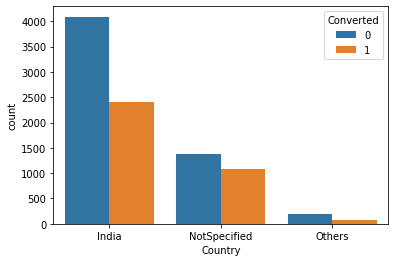

In [55]:
sns.barplot(x='Country', y='count', hue='Converted', data = countryCount)

In [59]:
countryCount.loc[countryCount.Country=='NotSpecified', 'count']/countryCount.loc[countryCount.Country=='NotSpecified', 'count'].sum()

2    0.562779
3    0.437221
Name: count, dtype: float64

#### We see that over 36% people chose not specify the country. However conversion 

In [26]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [27]:
# fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
# draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)